## Module 0: Introduction to Graph Neural Networks and Training Workflow

### Objective
Provide learners with a hands‑on introduction to building a simple Graph Neural Network (GNN) in PyTorch Geometric, covering graph creation, model construction, training loop, evaluation metrics, and plotting training/evaluation curves.

### 1. Setup & Imports

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, accuracy_score

### 2. Synthetic Graph Generation

In [2]:
# Create Erdos-Renyi graph
G = nx.erdos_renyi_graph(n=100, p=0.05)
edge_index = torch.tensor(list(G.edges)).t().contiguous()
# Node features and labels (regression or classification)
x = torch.randn((100, 16))  # 16-dim features
y_reg = torch.randn(100)    # regression target
y_cls = torch.randint(0, 2, (100,))  # binary classification

### 3. Data Object Construction

In [3]:
data_reg = Data(x=x, edge_index=edge_index, y=y_reg)
data_cls = Data(x=x, edge_index=edge_index, y=y_cls)

### 4. Model Definition

In [4]:
class SimpleGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

### 5. Training Loop

In [5]:
# Choose regression or classification
data, out_channels = data_reg, 1
# data, out_channels = data_cls, 2

model = SimpleGCN(in_channels=16, hidden_channels=32, out_channels=out_channels)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = F.mse_loss  # or F.cross_entropy for classification

train_losses = []
for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index).squeeze()
    loss = loss_fn(out, data.y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

### 6. Evaluation

In [6]:
model.eval()
with torch.no_grad():
    pred = model(data.x, data.edge_index).squeeze()
# Regression metrics
mae = mean_absolute_error(data.y.numpy(), pred.numpy())
rmse = root_mean_squared_error(data.y.numpy(), pred.numpy())
print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# Classification accuracy
# acc = accuracy_score(data.y.numpy(), pred.argmax(dim=1).numpy())
# print(f"Accuracy: {acc:.3f}")

MAE: 0.600, RMSE: 0.788


### 7. Plotting

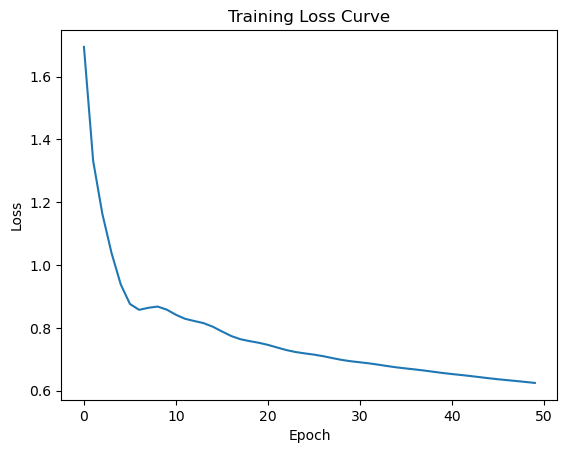

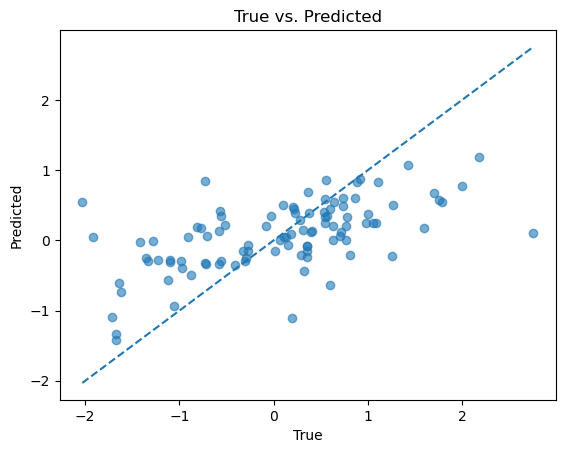

In [7]:
# Loss curve
plt.figure()
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# True vs. Pred scatter (regression)
plt.figure()
plt.scatter(data.y.numpy(), pred.numpy(), alpha=0.6)
plt.plot([data.y.min(), data.y.max()],[data.y.min(), data.y.max()],'--')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('True vs. Predicted')
plt.show()